# Proyecto Final Día 1

## 1. Importar el archivo 'cifosis.vsc' utilizando pandas

In [1]:
import pandas as pd

df_kyphosis = pd.read_csv('kyphosis-230525-093959.csv')
df_kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


## 2. Realizar un analisis exploratorio de datos (EDA) basico de los datos

In [2]:
df_kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [3]:
df_kyphosis.select_dtypes(exclude='number').describe()

,Kyphosis
count,81
unique,2
top,absent
freq,64


In [4]:
df_kyphosis['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [5]:
df_kyphosis.select_dtypes(include='number').describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## 3. Enumerar la edad media, minima y maxima (en años) considerada en este estudio utilizando 2 metodos

In [6]:
print('la edad media es: ', df_kyphosis['Age'].mean())
print('la edad maxima es: ', df_kyphosis['Age'].max())
print('la edad minima es: ', df_kyphosis['Age'].min())

la edad media es:  83.65432098765432
la edad maxima es:  206
la edad minima es:  1


In [18]:
print('la edad media es: ', (df_kyphosis['Age'] / 12).mean().round(3))
print('la edad maxima es: ', (df_kyphosis['Age'] / 12).max().round(3))
print('la edad minima es: ', (df_kyphosis['Age'] / 12).min().round(3))

la edad media es:  0.0
la edad maxima es:  0.177
la edad minima es:  -0.119


## 4. Representar la matriz de correlaciones

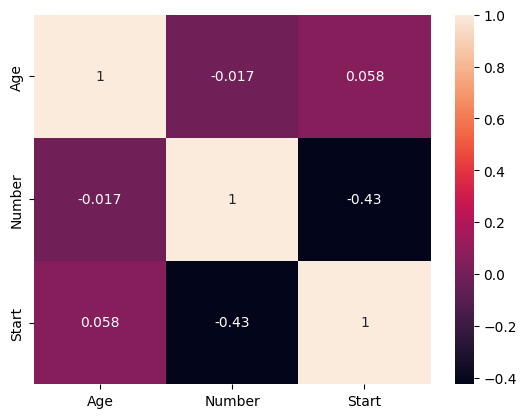

In [7]:
import seaborn as sns

sns.heatmap(df_kyphosis.select_dtypes(include='number').corr(), annot=True);

In [8]:
df_kyphosis.select_dtypes(include='number').corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


## 5. Convierte el tipo de datos de la columna edad de int64 a float64

In [9]:
df_kyphosis['Age'] = df_kyphosis['Age'].astype(float)
df_kyphosis['Age']

0      71.0
1     158.0
2     128.0
3       2.0
4       1.0
      ...  
76    157.0
77     26.0
78    120.0
79     42.0
80     36.0
Name: Age, Length: 81, dtype: float64

## 6. Definir una función que convierta la edad de meses a años

In [10]:
def meses_a_año(edad):
    edad = edad / 12
    return edad

## 7. Aplicar la funcion a la columna 'Edad' y añadir los resultados en una nueva columna edad titulada 'Edad en años'

In [11]:
df_kyphosis['Edad en años'] = df_kyphosis['Age'].apply(meses_a_año)
df_kyphosis['Edad en años']

0      5.916667
1     13.166667
2     10.666667
3      0.166667
4      0.083333
        ...    
76    13.083333
77     2.166667
78    10.000000
79     3.500000
80     3.000000
Name: Edad en años, Length: 81, dtype: float64

## 8. Cuales son las caracteristicas del niño mayor y del menor de este estudio?

In [12]:
mask1 = df_kyphosis['Age'].min()
mask2 = df_kyphosis['Age'].max()
print('Cantidad de vertebra afectadas:', df_kyphosis['Number'].loc[((df_kyphosis['Age'] == mask1) | (df_kyphosis['Age'] == mask2))].mean().round(0))
print('Primera vertebra operada para los menores:', df_kyphosis['Start'].loc[((df_kyphosis['Age'] == mask1))].median().round(0))
df_kyphosis.loc[((df_kyphosis['Age'] == mask1) | (df_kyphosis['Age'] == mask2))]

Cantidad de vertebra afectadas: 3.0
Primera vertebra operada para los menores: 15.0


,Kyphosis,Age,Number,Start,Edad en años
4,absent,1.0,4,15,0.083333
5,absent,1.0,2,16,0.083333
13,absent,1.0,4,12,0.083333
15,absent,1.0,3,16,0.083333
36,absent,1.0,3,9,0.083333
73,absent,206.0,4,10,17.166667


* Podemos notar que tenemos cinco pacientes de un mes de nacidos con afectaciones en las vertebras, por lo general con un promedio de 3 vertebras afectadas, y observando detalladamente encontramos que la primera vertebra operada suele ser la 15 o 16
* Para el de mayor de edad observamos que tiene 4 vertebras afectadas pero en este caso, a diferencia de los menores, su primera vertebra fue la 10, alejandose un poco de la obervación anterior
* Todos los pacientes están ausentes de cifosis

## 9. Escala la columna 'Edad' sin procesar (en meses) utilizando tanto la estandarización como la normalizazacion. Realice una comprobacion de sanidad

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

In [14]:
scaler1 = MinMaxScaler()
df_kyphosis['Age'] = scaler1.fit_transform(df_kyphosis['Age'].values.reshape(-1, 1))
df_kyphosis['Age']

0     0.341463
1     0.765854
2     0.619512
3     0.004878
4     0.000000
        ...   
76    0.760976
77    0.121951
78    0.580488
79    0.200000
80    0.170732
Name: Age, Length: 81, dtype: float64

In [15]:
scaler2 = StandardScaler()
df_kyphosis['Age'] = scaler2.fit_transform(df_kyphosis['Age'].values.reshape(-1, 1))
df_kyphosis['Age']

0    -0.219143
1     1.287494
2     0.767964
3    -1.414063
4    -1.431381
        ...   
76    1.270177
77   -0.998439
78    0.629423
79   -0.721356
80   -0.825262
Name: Age, Length: 81, dtype: float64

In [19]:
df_kyphosis.describe().round(3)

,Age,Number,Start,Edad en años
count,81.000,81.000,81.000,81.000
mean,0.000,4.049,11.494,6.971
std,1.006,1.619,4.884,4.842
min,-1.431,2.000,1.000,0.083
25%,-0.998,3.000,9.000,2.167
50%,0.058,4.000,13.000,7.250
75%,0.803,5.000,16.000,10.833
max,2.119,10.000,18.000,17.167
